# support vector machine:

_ability to performing linear or nolinear classification, regression and even outlier detection_

_svm sensetive to feature scales_

_if we impose that all instance  must be off the street and on the right side this is hard margin classification

hard margin only works if the data linealy separable and sensetive to outlier_

__if overfiting occure you can try regularizing it by reduce C and in RBF kenrel reduce gamma__

_unllike logistic regression classifacation svm do not output probilities for each class instead directly you need to use regression logstic to do that _



In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
x = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64) 


In [3]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
svm_classi = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svm', LinearSVC(C = 1, loss='hinge')), 
    
])
#also make sure you set loss to 'hinge' and for better performance set dual to False unless there are more features than training instance


In [5]:
svm_classi.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_classi.predict([[5.5, 1.7]])

array([1.])

##  Nolinear Svm Classifacation: 

In [7]:
##many datasts are not even close to being linearly separable
##one solution to solve use polynomial fetures

In [8]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [9]:
x, y = make_moons(n_samples=100, noise=0.15) #2 class it has

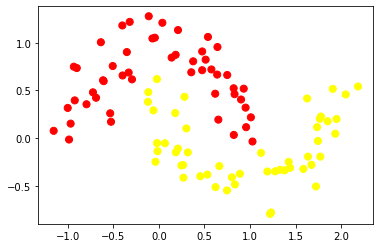

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');
#as you can see we can't seperate by line 

In [11]:
polynomial_svm = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_classi', LinearSVC(C=10, loss='hinge')),
])

In [12]:
polynomial_svm.fit(x, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_classi', LinearSVC(C=10, loss='hinge'))])

<AxesSubplot:>

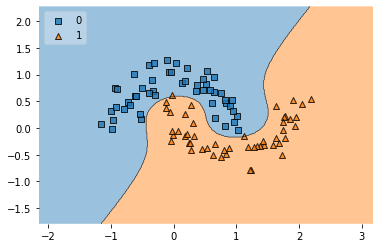

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y, clf=polynomial_svm, legend=2)

In [14]:
polynomial_svm100 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('scaler', StandardScaler()),
    ('svm_classi', LinearSVC(C=10, loss='hinge')),
])

In [15]:
polynomial_svm100.fit(x, y)

/home/hassan/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()),
                ('svm_classi', LinearSVC(C=10, loss='hinge'))])

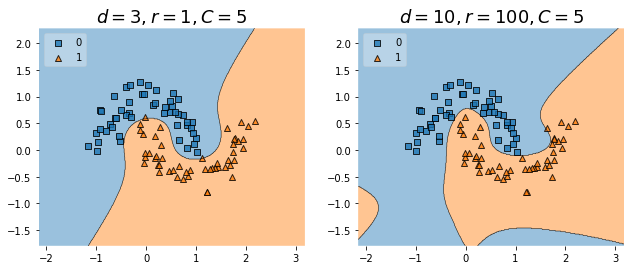

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])

plot_decision_regions(x, y, clf=polynomial_svm, legend=2)
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_decision_regions(x, y, clf=polynomial_svm100, legend=2)
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

In [17]:
from sklearn.svm import SVC
rbf_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_classi', SVC(kernel='rbf', gamma=5))
])
# gamma acts like a regularization so if your model is overfiting you should reduce it if it underfiting you should increase it


<AxesSubplot:>

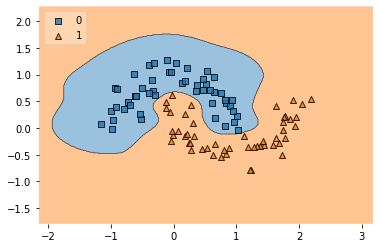

In [18]:
rbf_kernel.fit(x, y)

plot_decision_regions(x, y, clf=rbf_kernel, legend=2)


# Regression task with SVM 

## use svm for regression instead of classification ,the trick is trie to fit as many instance as possible on the street while limiting margin violation.
### for nonlinear regression task you need to kernelized SVM (polynomial).

In [53]:
from  sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=1)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=1)
x = 2 * np.random.rand(50, 1)
y = (3 * x + np.random.randn(50, 1)).ravel()
svm_reg.fit(x, y)
svm_reg2.fit(x, y)

LinearSVR(epsilon=0.5, random_state=1)

### as mention earlier we use LinearSVR for resgression task by SVM.
### code below show you how to use it in best way to have largest street by hyperparameter epsilon
##### 1) we need to find support vectore if we do y - y_predict find new point that represent support vector
#### 2) we have model and support vector so we can draw a line by predicted and xls and draw margin by + and - epsilon of each model 
#### 3) subplots help us two compare 2 plot in front of each other 

In [84]:
def find_support_vectors(svm_regression, x, y):
    y_pred = svm_regression.predict(x)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)

eps_x1 = 1
eps_y_pred = svm_reg.predict([[eps_x1]])

array([[ 5],
       [ 9],
       [23],
       [33],
       [37],
       [38]])

Text(0.5, 1.0, '$\\epsilon = 0.5$')

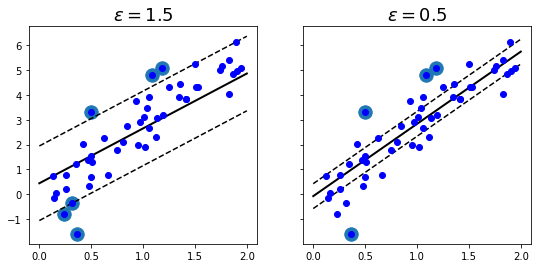

In [86]:
fig, axess = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axess[0])
axes = [0,2, 3, 11]
x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
y_pred = svm_reg.predict(x1s)
plt.plot(x1s, y_pred, "k-", linewidth=2)
plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
plt.scatter(x[svm_reg.support_], y[svm_reg.support_])
plt.plot(x, y, "bo")
plt.title(r"$\epsilon = {}$".format(svm_reg.epsilon), fontsize=18)

plt.sca(axess[1])
axes = [0,2, 3, 11]
x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
y_pred = svm_reg2.predict(x1s)
plt.plot(x1s, y_pred, "k-", linewidth=2)
plt.plot(x1s, y_pred + svm_reg2.epsilon, "k--")
plt.plot(x1s, y_pred - svm_reg2.epsilon, "k--")
plt.scatter(x[svm_reg2.support_], y[svm_reg2.support_])
plt.plot(x, y, "bo")
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)


## if we have nonlinear we need to use polynomial kernel 

In [144]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

#as you can see we cant draw good line for regression task

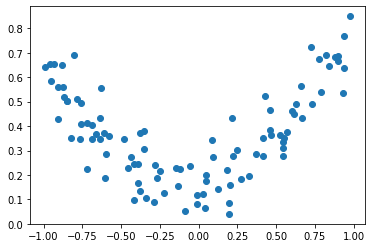

In [145]:
plt.scatter(x, y)

In [183]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, epsilon=0.1, C=0.01, gamma='scale')
svm_poly_reg2 = SVR(kernel='poly', degree=2, epsilon=0.1, C=100)
svm_poly_reg.fit(x, y)
svm_poly_reg2.fit(x, y)

SVR(C=100, degree=2, kernel='poly')

Text(0.5, 1.0, '$\\epsilon = 0.1$ C=100 gamma=scale')

<Figure size 432x288 with 0 Axes>

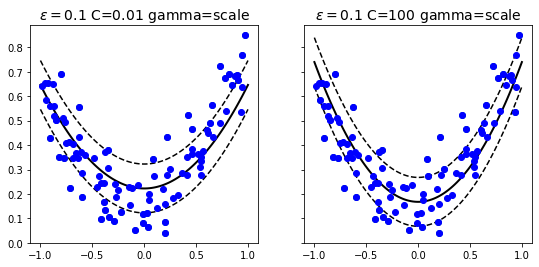

In [184]:
plt.figure()
fig, axess = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axess[0])
axes = [-1, 1, 0, 1]
x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
y_pred = svm_poly_reg.predict(x1s)
plt.plot(x1s, y_pred, "k-", linewidth=2)
plt.plot(x1s, y_pred + svm_poly_reg.epsilon, "k--")
plt.plot(x1s, y_pred - svm_poly_reg.epsilon, "k--")
plt.scatter(x[svm_poly_reg.support_], y[svm_poly_reg.support_])
plt.plot(x, y, "bo")
plt.title(r"$\epsilon = {}$ C={} gamma={}".format(svm_poly_reg.epsilon, svm_poly_reg.C, svm_poly_reg.gamma), fontsize=14)




plt.sca(axess[1])
axes = [-1, 1, 0, 1]
x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
y_pred = svm_poly_reg2.predict(x1s)
plt.plot(x1s, y_pred, "k-", linewidth=2)
plt.plot(x1s, y_pred + svm_poly_reg2.epsilon, "k--")
plt.plot(x1s, y_pred - svm_poly_reg2.epsilon, "k--")
plt.scatter(x[svm_poly_reg2.support_], y[svm_poly_reg2.support_])
plt.plot(x, y, "bo")
plt.title(r"$\epsilon = {}$ C={} gamma={}".format(svm_poly_reg2.epsilon, svm_poly_reg2.C, svm_poly_reg2.gamma), fontsize=14)